# Koneoppiminen: Osa 2: k-means

In [1]:
# Kirjoita tähän tietosi!
student_name = 'Riikka Kokko'
student_id = 'AA9067'

## Tehtävä 1
### Aihe: Siemenaineiston esikäsittely

2 pistettä

Tutustu aineistoon *seeds* osoitteessa https://archive.ics.uci.edu/ml/datasets/seeds .

1. Lue aineisto Pandas-kirjaston DataFrameen.

2. Muista asettaa sarakkeiden nimet aineiston dokumentaation mukaisesti. 

Vinkki: jos tabulaattorit erottimina tuottavat ongelmia, `delim_whitespace=True` auttaa. Se tekee kaikista tyhjistä merkeistä datakenttien erottimia.

In [2]:
# Kirjoita toteutuksesi tähän soluun. Tallenna vastauksesi df-muuttujaan.
import pandas as pd
#df=pd.read_csv("seeds_dataset.txt", sep="\t", error_bad_lines=False)
df=pd.read_csv("seeds_dataset.txt", delim_whitespace=True)
df.columns = ["area A", "perimeter P", "compactness C = 4*pi*A/P^2", "length of kernel", "width of kernel", "asymmetry coefficient",  "length of kernel groove", "class"]
df.head()

,area A,perimeter P,compactness C = 4*pi*A/P^2,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [3]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tallenna DataFrame df-muuttujaan.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['area A', 'perimeter P', 'compactness C = 4*pi*A/P^2',
       'length of kernel', 'width of kernel', 'asymmetry coefficient',
       'length of kernel groove', 'class'],
      dtype='object')
First row by position: area A                        14.8800
perimeter P                   14.5700
compactness C = 4*pi*A/P^2     0.8811
length of kernel               5.5540
width of kernel                3.3330
asymmetry coefficient          1.0180
length of kernel groove        4.9560
class                          1.0000
Name: 0, dtype: float64


## Tehtävä 2
### Aihe: Visualisointi

2 pistettä

Katsotaan näkyykö datassa ryhmittelyjä eri muuttujien suhteen.

Visualisoi aineisto käyttäen Seabornin [pairplot](https://seaborn.pydata.org/examples/scatterplot_matrix.html) -funktiota (tunnetaan myös nimellä scatterplot matrix). 

In [4]:
# Kirjoita toteutuksesi tähän soluun. 

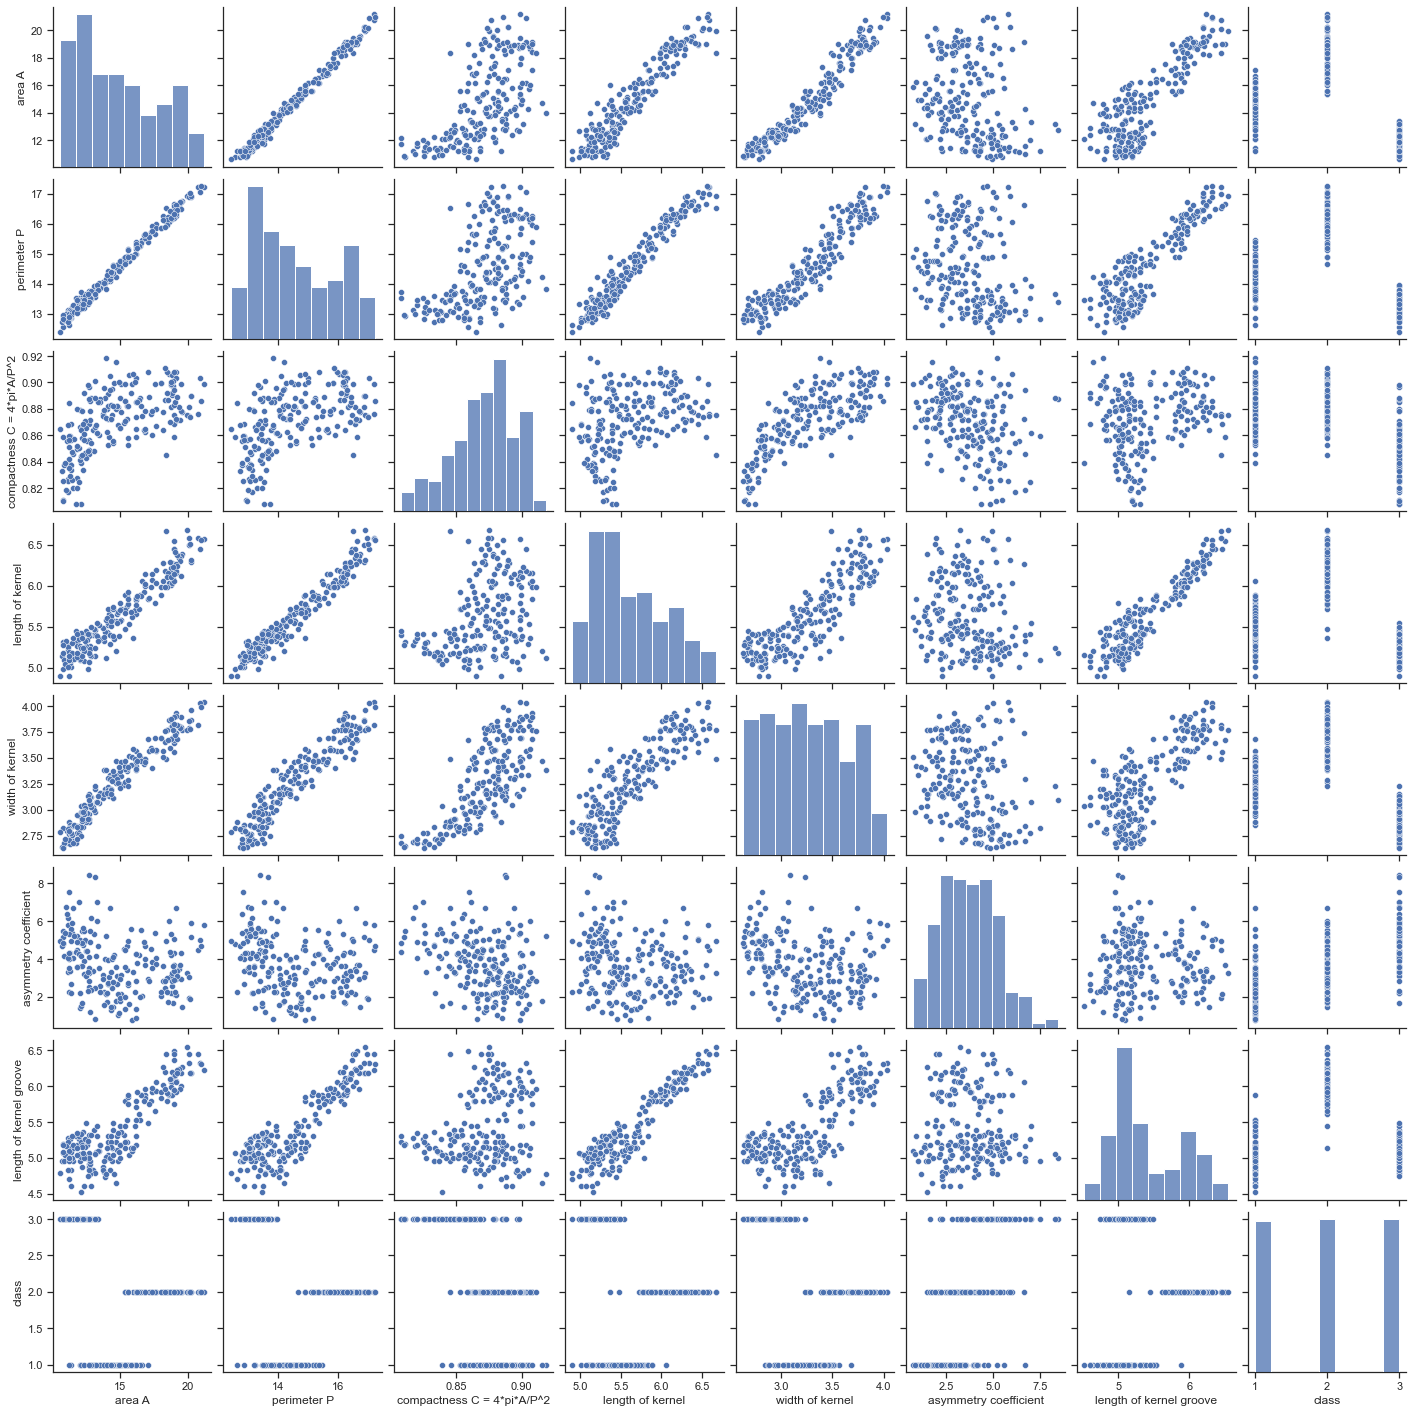

In [5]:
# Kirjoita toteutuksesi tähän soluun. 
import seaborn as sns
sns.set_theme(style="ticks")

ax=sns.pairplot(df)


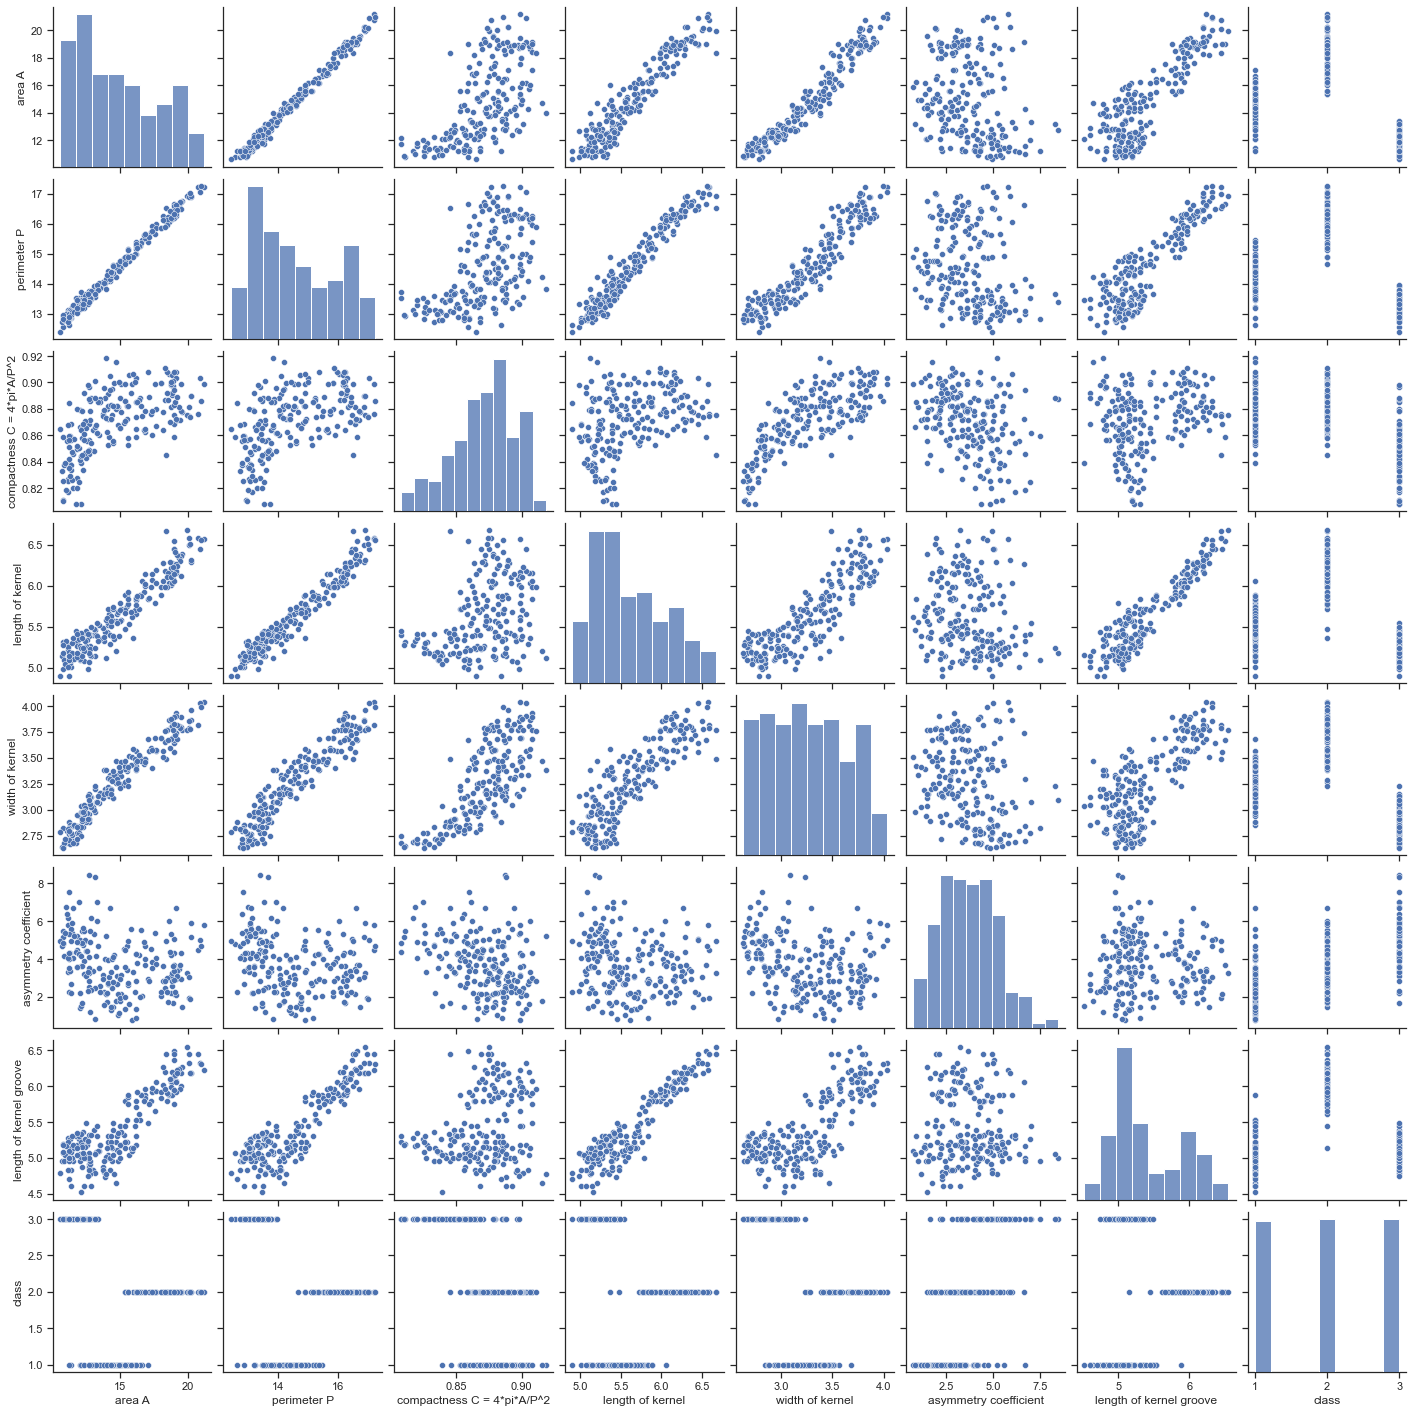

In [6]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tee vastauksesi siten, että tämän solun tuloksena näkyy alla kaaviokuva. 
ax.fig

## Tehtävä 3
### Aihe: k-means

6 pistettä

1. Suorita klusterointi aineistolle käyttäen `scikit-learn`-kirjaston `cluster`-moduulin [k-means-menetelmää](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html). 

HUOM! Älä sisällytä luokkamuuttujaa klusterointiin. 

2. Visualisoi jälleen klusterit käyttäen Seabornin `pairplot` -funktiota. 

Tallenna klusteroinnin tulokset DataFramen `df` sarakkeeseen `cluster`.

Vinkki: Tiedetään, että aineistossa on mitattu kolmea erilaista kasvia. 

Vinkki: `pairplot`-funktiossa on `hue`-parametri värin asettamiseen.

In [7]:
#Suorita klusterointi aineistolle käyttäen scikit-learn-kirjaston cluster-moduulin k-means-menetelmää.
from sklearn.cluster import KMeans
X=df.drop("class", axis=1)
kmeans = KMeans(n_clusters=3)
KMeans=kmeans.fit(X)
#print(KMeans.labels_)
cluster=KMeans.cluster_centers_
#print(cluster)
predict=KMeans.predict(X)
#print(predict)

In [8]:
#Tallenna klusteroinnin tulokset DataFramen df sarakkeeseen cluster
df["cluster"]=pd.Series(predict, index=df.index)

In [9]:
df.head()

,area A,perimeter P,compactness C = 4*pi*A/P^2,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class,cluster
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,0
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,0
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,0
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,0
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1,0


In [10]:
pd.crosstab(df['class'], df.cluster)

cluster,0,1,2
class,,,
1,59,1,9
2,10,60,0
3,2,0,68


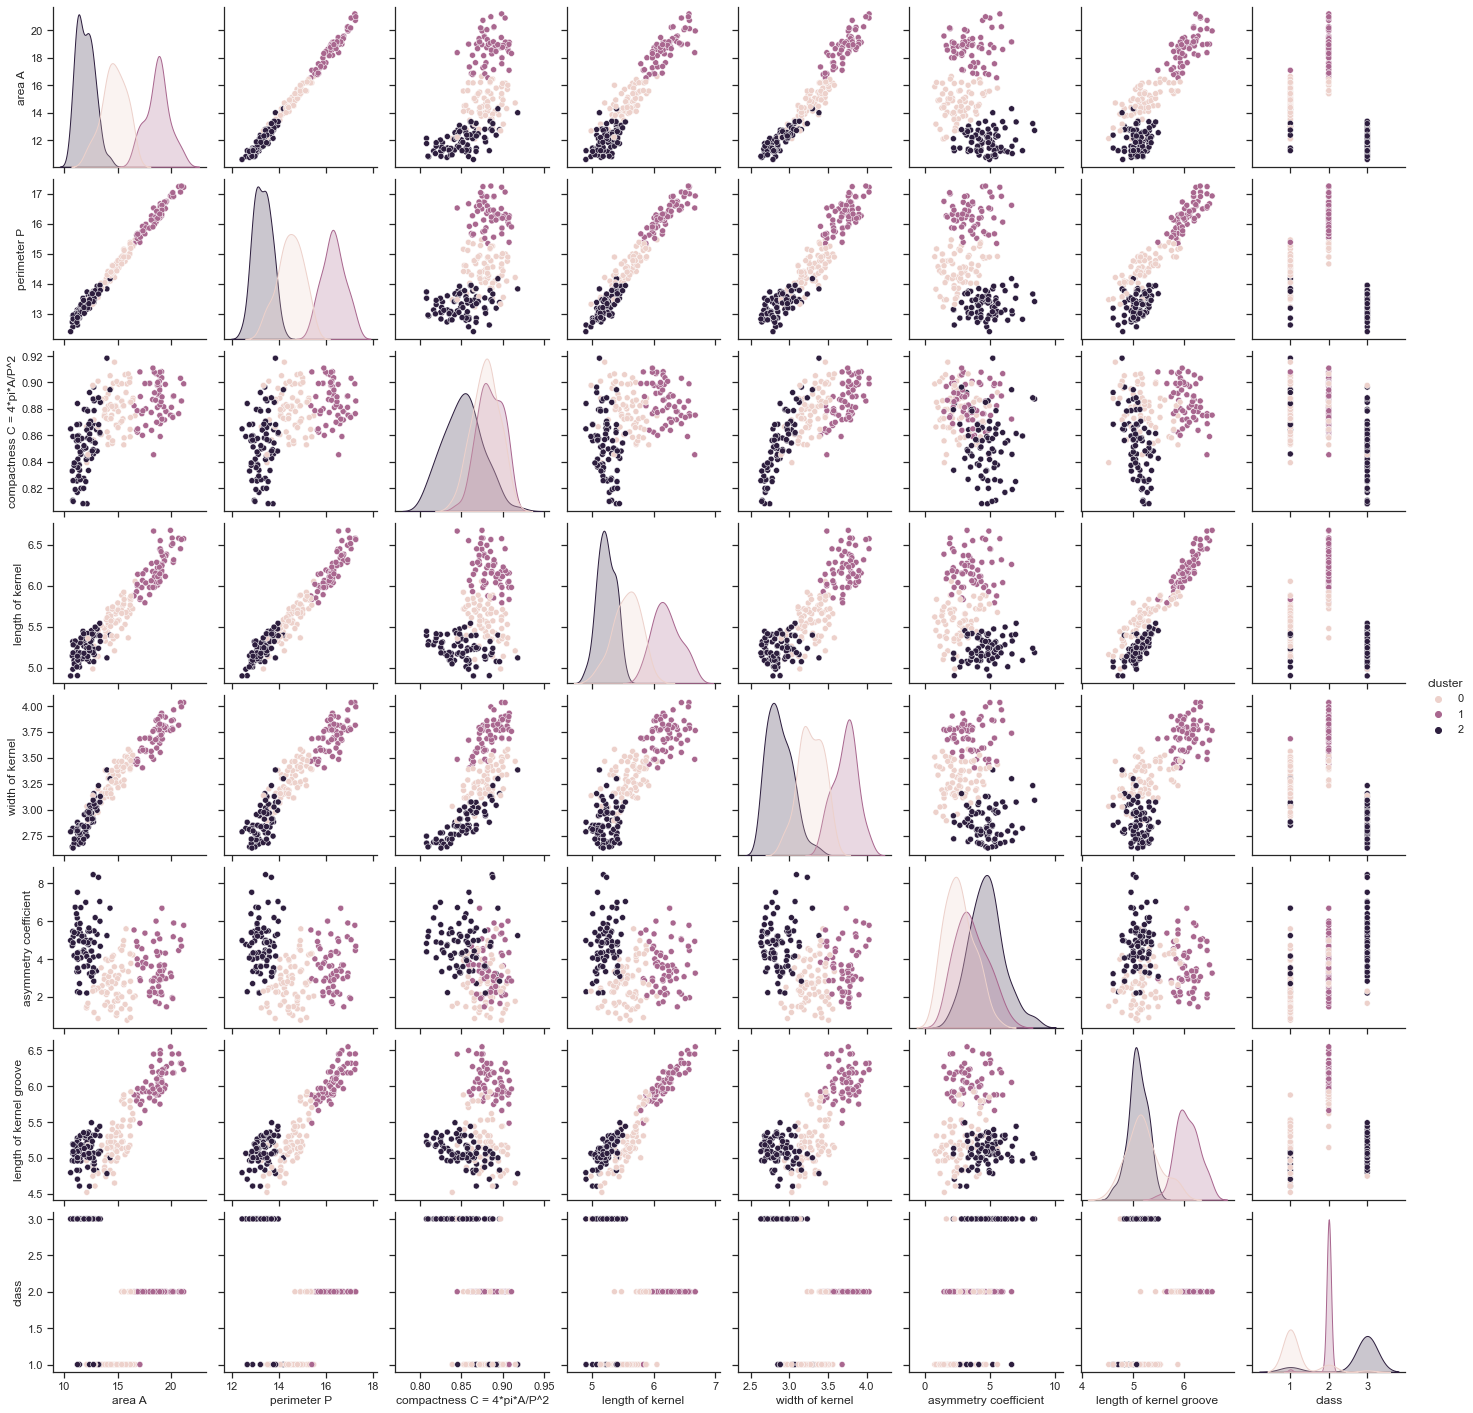

In [11]:
#Visualisoi jälleen klusterit käyttäen Seabornin pairplot -funktiota.
ax=sns.pairplot(df,hue='cluster')

Clusters: 0      0
1      0
2      0
3      0
4      0
      ..
204    2
205    2
206    2
207    2
208    2
Name: cluster, Length: 209, dtype: int32


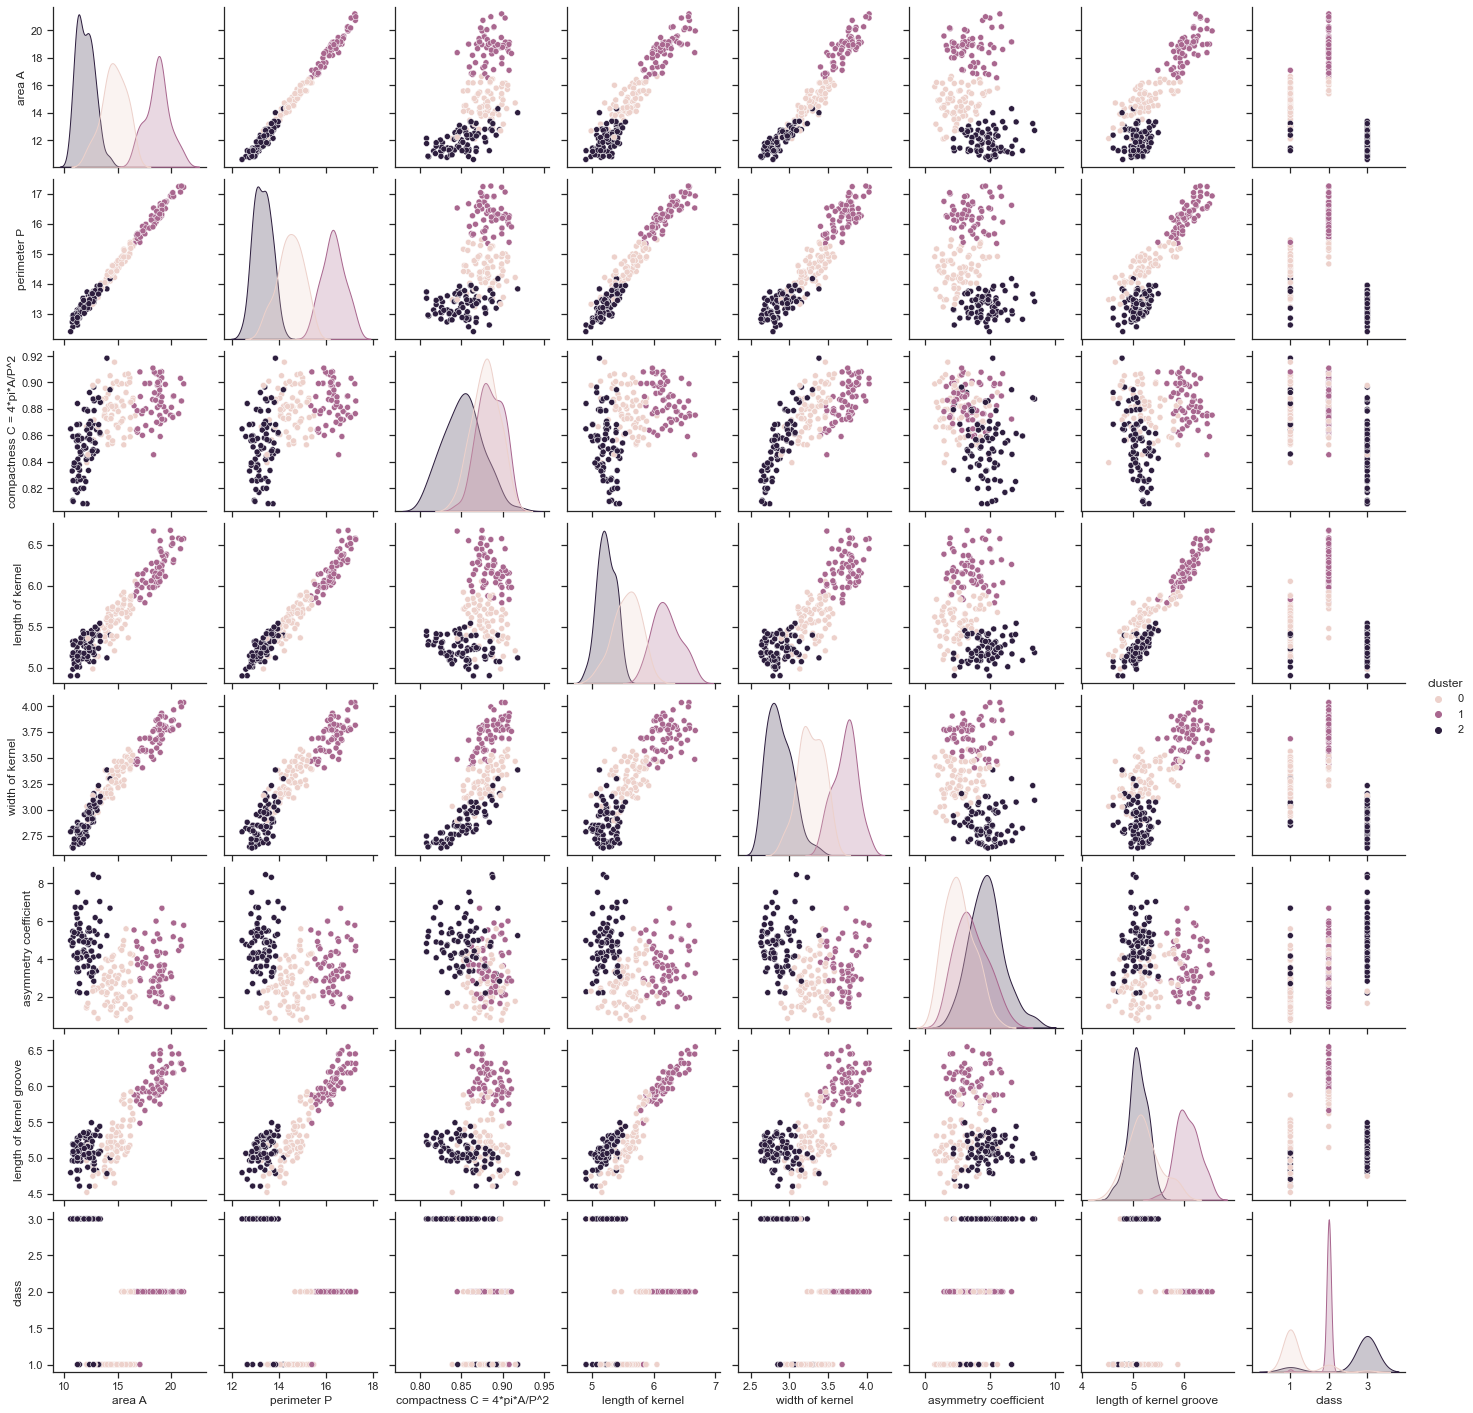

In [12]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tallenna klusteroinnnin tarkkuus acc-muuttujaan.
# Tee vastauksesi siten, että tämän solun tuloksena näkyy alla kaaviokuva.
print(f'Clusters: {df["cluster"]}')
ax.fig